In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from astropy import constants as const
from scipy.optimize import curve_fit as cf

In [2]:
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')
#print(len(data),len(freq),len(time))

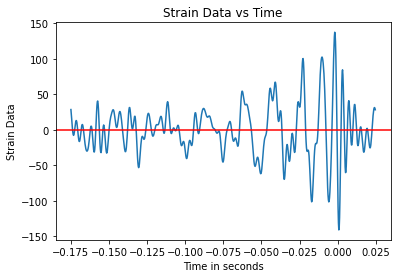

In [3]:
plt.figure()
plt.plot(time,data)
plt.axhline(y=0,color='r')
plt.title("Strain Data vs Time")
plt.xlabel("Time in seconds")
plt.ylabel("Strain Data")
plt.show()

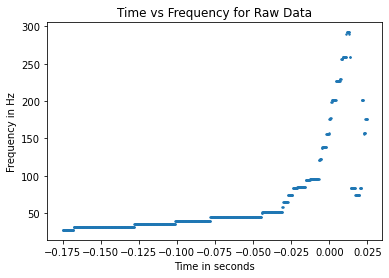

In [4]:
plt.figure()
plt.scatter(time,freq,s=2)
plt.title("Time vs Frequency for Raw Data")
plt.xlabel("Time in seconds")
plt.ylabel("Frequency in Hz")
plt.show()
#The frequency plot resembles an exponential growth at first but after reaching a peak, it decays


In [5]:
idt=np.argwhere(np.diff(np.sign(data))).flatten()
print(idt)

[  4  10  18  27  33  52  56  66  76  86  90 102 138 152 175 201 216 225
 248 252 267 273 279 283 290 329 340 345 387 419 431 453 484 526 567 605
 630 664 685 701 715 725 734 742 751 757 767 776 780 794 797 809]


In [6]:
freq1=np.empty(0)
time1=np.empty(0)

for i in idt:
    freq1=np.append(freq1,freq[i])
    time1=np.append(time1,time[i])

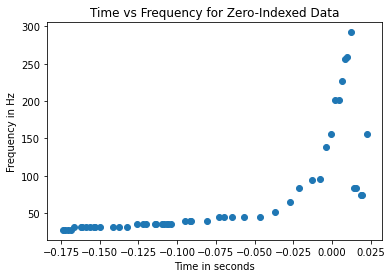

In [7]:
plt.figure()
plt.scatter(time1,freq1)
plt.title("Time vs Frequency for Zero-Indexed Data")
plt.xlabel("Time in seconds")
plt.ylabel("Frequency in Hz")
plt.show()

In [8]:
freq2=np.empty(0)
time2=np.empty(0)
for i in range(len(time1)):
    if time1[i]<0 and freq1[i]>50:
        time2=np.append(time2,time1[i])
        freq2=np.append(freq2,freq1[i])
#got all t<tc

In [9]:
timelog=np.empty(0)
freqlog=np.empty(0)
for i in time2:
    timelog=np.append(timelog,np.log(-i))
for i in freq2:
    freqlog=np.append(freqlog,np.log(i))

In [10]:
def logfrequency(logminust,M):
    #c=(np.power(5,3/8)/(8*np.pi))*np.power(const.c.value,15/8)/np.power(const.G.value,5/8)
    #f=c/(np.power(M,5/8)*np.power(-t,3/8))
    c=(3/8)*np.log(5)-np.log(8*np.pi)+(15/8)*np.log(const.c.value)-(5/8)*np.log(const.G.value)-(5/8)*np.log(M)
    return c-(3/8)*logminust

In [11]:
p_opt, p_cov=cf(logfrequency,timelog,freqlog)

In [12]:
print(p_opt)

[7.65468224e+31]


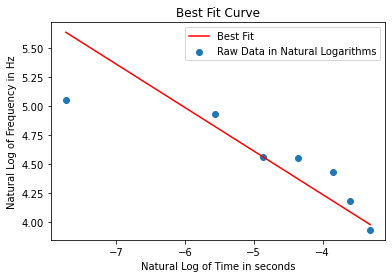

In [14]:
plt.figure()
plt.scatter(timelog,freqlog,label='Raw Data in Natural Logarithms')
plt.plot(timelog,logfrequency(timelog,*p_opt),'r',label='Best Fit')
plt.title("Best Fit Curve")
plt.xlabel("Natural Log of Time in seconds")
plt.ylabel("Natural Log of Frequency in Hz")
plt.legend()
plt.show()

In [ ]:
print('Chirp Mass of the system is:',p_opt,'kg.')